In [1]:
### https://anaconda.org/anaconda/py-xgboost
### Importando as libs
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, mean_squared_error
import pylab as pl
from sklearn import model_selection
from itertools import combinations
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Scripts

In [2]:
def seedAnalytcs(train,colunas,colunasy,teste_size):
    for seed_it in  range(1,15):
        print('SEED=',seed_it)
        x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(train[colunas],train[colunasy],test_size=teste_size,random_state=seed_it)
        x =x_treino.sort_values(by=['SaudacaoNum'])['SaudacaoNum'].unique()
        y=x_teste.sort_values(by=['SaudacaoNum'])['SaudacaoNum'].unique()
        print(x)
        print(y )
        print(y in x)

In [3]:
class Titanic:
    score=0
    colunas_final=[]
    max_depth_final=0
    seed_final=0
    acertos_final=0
    erros_final=0
    min_child_weight_final=0
    actuals=0
    predictions=0

In [4]:
def forward_feature_construction(colunasx,colunasy):
    size = len(colunasx)
    lista = list()
    for id in  range(1,size):
        for x in  combinations(colunasx,r=id):
            lista.append(list(x))
    return lista    

In [5]:
def print_titanic(resultado):
    print('#####################################################')
    print('################# RESULTADOS ########################')
    print('#####################################################')
    for titanic in resultado:
        print_titanic_valores(titanic)

In [6]:
def print_titanic_valores(titanic):
    print('Score =',titanic.score)
    print('acertos=',titanic.acertos_final)
    print('erros=',titanic.erros_final)
    print('colunas=',titanic.colunas_final)
    print('seed=',titanic.seed_final)
    print('max_depth_final=',titanic.max_depth_final)
    print('min_child_weight_final=',titanic.min_child_weight_final)
    print(confusion_matrix(titanic.actuals, titanic.predictions))
    print('#####################################################')

In [7]:
def predict(lista, train, colunasy,teste_size,scan):
   
    ### Config Default
    colunasx_it=['Classe','FamiliaQtde','PassagemPreco','SexoNum','SaudacaoNum']
    seed = 9
    max_depth=3
    min_child_weight=1
    
    ### Inicializando variáveis
    seed_it = seed
    max_depth_it=max_depth
    min_child_weight_it=min_child_weight
    colunasx_it=colunasx_it
    ultimo_acerto=0
    
    ### Config Final
    resultado = []
          
    if scan:
        for colunasx_it in  lista:
            ### Slice
            x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(train[colunasx_it],train[colunasy],test_size=teste_size,random_state=seed_it)
            ### Modelo - Treino
            xgb_model = xgb.XGBClassifier(max_depth=max_depth_it,min_child_weight=min_child_weight_it).fit(x_treino, y_treino)
            ### Modelo - Predict
            predictions = xgb_model.predict(x_teste)
            ### Confusion Matrix
            actuals = y_teste
            #print(colunasx)
            previsto = pd.DataFrame({'previsto':predictions},index=actuals.index)
            resultadoErros =       previsto.loc[previsto['previsto'].values != actuals['Sobreviventes'].values]
            resultadoAcertos =     previsto.loc[previsto['previsto'].values == actuals['Sobreviventes'].values]
            pontuacao=(xgb_model.score(x_teste,y_teste)*100.0)

            if resultadoAcertos.size >= ultimo_acerto and pontuacao >84 :
                if(resultadoAcertos.size>ultimo_acerto):
                    resultado=[]
                titanic = Titanic()
                ### Score
                titanic.score = pontuacao
                ### Resultado Final
                titanic.max_depth_final=max_depth_it
                titanic.seed_final=seed_it
                titanic.colunas_final=colunasx_it
                titanic.acertos_final=resultadoAcertos.size
                titanic.erros_final=resultadoErros.size
                titanic.min_child_weight_final=min_child_weight
                titanic.actuals=actuals
                titanic.predictions=predictions
                
                resultado.append(titanic)
                ultimo_acerto=resultadoAcertos.size
                
                

    else:
        ### Slice
        x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(train[colunas],train[colunasy],test_size=teste_size,random_state=seed)
        ### Modelo - Treino
        xgb_model = xgb.XGBClassifier(max_depth=max_depth,min_child_weight=min_child_weight).fit(x_treino, y_treino)
        ### Modelo - Predict
        predictions = xgb_model.predict(x_teste)
        ### Score
        score = xgb_model.score(x_teste,y_teste)
        actuals = y_teste
        previsto = pd.DataFrame({'previsto':predictions},index=actuals.index)
        resultadoErros =       previsto.loc[previsto['previsto'].values != actuals['Sobreviventes'].values]
        resultadoAcertos =     previsto.loc[previsto['previsto'].values == actuals['Sobreviventes'].values]
        ### Resultado Final
        max_depth_final=max_depth
        seed_final=seed
        colunas_final=colunas
        acertos_final=resultadoAcertos.size
        min_child_weight_final=min_child_weight
    print_titanic(resultado)
    return resultado


    

In [8]:
def predictTitanic(lista,train,colunasy,teste_size):
    
    modelo=0
    ultimo_acerto=0
    max_depth=3
    min_child_weight=1
    titanicResultado = Titanic()
    seed = 9
    
    seed_it = seed
    max_depth_it=max_depth
    min_child_weight_it=min_child_weight
    for titanic in lista:
        for seed_it in  range(9,9):
            for min_child_weight_it in  range(1,10):
                for max_depth_it in  range(0,15):
                    modelo+=1
                    x_treino, x_teste, y_treino, y_teste=model_selection.train_test_split(train[titanic.colunas_final],train[colunasy],test_size=teste_size,random_state=seed_it)
                    xgb_model = xgb.XGBClassifier(max_depth=max_depth_it,min_child_weight=min_child_weight_it,
                                                  n_estimators=1000,n_jobs=4, subsample=0.8, colsample_bytree=0.8).fit(x_treino, y_treino)
                    y_pred = xgb_model.predict(test_csv[titanic.colunas_final])
                    ### Modelo - Predict
                    predictions = xgb_model.predict(x_teste)
                    ### Confusion Matrix
                    actuals = y_teste
                    previsto = pd.DataFrame({'previsto':predictions},index=actuals.index)
                    resultadoErros =       previsto.loc[previsto['previsto'].values != actuals['Sobreviventes'].values]
                    resultadoAcertos =     previsto.loc[previsto['previsto'].values == actuals['Sobreviventes'].values]
                    pontuacao=(xgb_model.score(x_teste,y_teste)*100.0)
                    if resultadoAcertos.size >= ultimo_acerto and pontuacao > 84.18604651162791 :
                        titanicResultado = Titanic()
                        ### Score
                        titanicResultado.score = pontuacao
                        ### Resultado Final
                        titanicResultado.max_depth_final=max_depth_it
                        titanicResultado.seed_final=seed_it
                        titanicResultado.colunas_final=titanic.colunas_final
                        titanicResultado.acertos_final=resultadoAcertos.size
                        titanicResultado.erros_final=resultadoErros.size
                        titanicResultado.min_child_weight_final=min_child_weight
                        titanicResultado.actuals=actuals
                        titanicResultado.predictions=predictions
                        ultimo_acerto=resultadoAcertos.size
                        print_titanic_valores(titanicResultado) 

# Coleta de dados

## Fontes

In [9]:
### Coletando as fontes de dados
test_csv = pd.read_csv('r_teste.csv', sep = ',', encoding = 'UTF-8',header='infer')
train_csv = pd.read_csv('r_treino.csv', sep = ',', encoding = 'UTF-8',header='infer')
train_dropna_csv = pd.read_csv('r_treino_dropna.csv', sep = ',', encoding = 'UTF-8',header='infer')

In [10]:
colunasx=[
    'Classe',
    'FaixaEtaria',
    #'PortoEmbarqueNum',
    #'ParentesIrmao',
    #'ParentesFilhos',
    'SexoNum',
    'SaudacaoNum',
    'PassagemPreco',
    'FamiliaQtde',
    #'EstaSozinho',
    #'TemCabine'
]
colunasy=['Sobreviventes']

In [11]:
colunas = forward_feature_construction(colunasx,colunasy)

In [12]:
train= train_dropna_csv
#train= train_csv
train=train.set_index(train['PassageiroId'])

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 14 columns):
PassageiroId        714 non-null int64
Idade               714 non-null float64
FaixaEtaria         714 non-null float64
Classe              714 non-null int64
PortoEmbarqueNum    714 non-null int64
ParentesIrmao       714 non-null int64
ParentesFilhos      714 non-null int64
SexoNum             714 non-null int64
SaudacaoNum         714 non-null int64
PassagemPreco       714 non-null float64
FamiliaQtde         714 non-null int64
EstaSozinho         714 non-null float64
TemCabine           714 non-null float64
Sobreviventes       714 non-null int64
dtypes: float64(5), int64(9)
memory usage: 83.7 KB


In [14]:
### Config
teste_size=0.30 ##30%

In [15]:
resultado=predict(colunas, train, colunasy,teste_size,True)
#84.18604651162791

#####################################################
################# RESULTADOS ########################
#####################################################
Score = 84.18604651162791
acertos= 181
erros= 34
colunas= ['SaudacaoNum', 'PassagemPreco', 'FamiliaQtde']
seed= 9
max_depth_final= 3
min_child_weight_final= 1
[[116  13]
 [ 21  65]]
#####################################################
Score = 84.18604651162791
acertos= 181
erros= 34
colunas= ['Classe', 'FaixaEtaria', 'SaudacaoNum', 'PassagemPreco', 'FamiliaQtde']
seed= 9
max_depth_final= 3
min_child_weight_final= 1
[[116  13]
 [ 21  65]]
#####################################################
Score = 84.18604651162791
acertos= 181
erros= 34
colunas= ['Classe', 'SexoNum', 'SaudacaoNum', 'PassagemPreco', 'FamiliaQtde']
seed= 9
max_depth_final= 3
min_child_weight_final= 1
[[120   9]
 [ 25  61]]
#####################################################


# Tuning

In [16]:
predictTitanic(resultado,train,colunasy,teste_size)

In [17]:
param_teste1 = {
 'max_depth':np.arange(3,50,2),
 'min_child_weight':np.arange(1,60,2),
 'learning_rate':[0.1,0.3,0.5,1.0]
}

In [30]:
seed= 9
colunas= ['Classe', 'FaixaEtaria', 'SaudacaoNum', 'PassagemPreco', 'FamiliaQtde']
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(train[colunas],train[colunasy],test_size=teste_size,random_state=seed)

c, r = y_treino.shape
y_treino = y_treino.values.reshape(c,)

xgb_model = xgb.XGBClassifier()
gsearch1 = GridSearchCV(xgb_model, param_grid = param_teste1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(x_treino,y_treino)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.82164, std: 0.02845, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1},
  mean: 0.83367, std: 0.03245, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3},
  mean: 0.82565, std: 0.03504, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 5},
  mean: 0.80962, std: 0.03306, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 7},
  mean: 0.82164, std: 0.03481, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 9},
  mean: 0.81563, std: 0.02863, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 11},
  mean: 0.80160, std: 0.04249, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 13},
  mean: 0.80561, std: 0.04672, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 15},
  mean: 0.77355, std: 0.02159, params: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 17},
  mean: 0.77555, std: 0.02154, params: {'learning_rate': 0.1, 'max_depth': 3, 

# Relatório Kaggle

## Configuração

In [37]:
max_depth_final= 5 #Quantidade máxima de itens na extensão
min_child_weight_final= 7
learning_rate_final= 0.1   #

## Slice

In [38]:
x_treino, x_teste, y_treino, y_teste = model_selection.train_test_split(train[colunas],train[colunasy],test_size=teste_size,random_state=seed)

## Modelo

In [39]:
xgb_model = xgb.XGBClassifier(max_depth=max_depth_final,
                              min_child_weight=min_child_weight_final,
                              learning_rate=learning_rate_final
                             ).fit(x_treino, y_treino)

## Configurações do Modelo

In [40]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=7, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [41]:
predictions = xgb_model.predict(x_teste)

In [42]:
actuals = y_teste
previsto = pd.DataFrame({'previsto':predictions},index=actuals.index)
resultadoErros =       previsto.loc[previsto['previsto'].values != actuals['Sobreviventes'].values]
resultadoAcertos =     previsto.loc[previsto['previsto'].values == actuals['Sobreviventes'].values]
print(xgb_model.score(x_teste,y_teste)*100.0)

82.32558139534883


## Análise Exploratória dos erros

In [25]:
listResultadoErros = train.loc[(train.PassageiroId[resultadoErros.index])]
listResultadoErros.sort_values(by=['Sobreviventes','FaixaEtaria', 'Idade'])

,PassageiroId,Idade,FaixaEtaria,Classe,PortoEmbarqueNum,ParentesIrmao,ParentesFilhos,SexoNum,SaudacaoNum,PassagemPreco,FamiliaQtde,EstaSozinho,TemCabine,Sobreviventes
PassageiroId,,,,,,,,,,,,,,
375,375,3.0,2.0,3,1,3,1,0,2,21.0750,4,0.0,0.0,0
25,25,8.0,3.0,3,1,3,1,0,2,21.0750,4,0.0,0.0,0
15,15,14.0,4.0,3,1,0,0,0,2,7.8542,0,1.0,0.0,0
655,655,18.0,5.0,3,3,0,0,0,2,6.7500,0,1.0,0.0,0
749,749,19.0,5.0,1,1,1,0,1,0,53.1000,1,0.0,1.0,0
42,42,27.0,7.0,2,1,1,0,0,1,21.0000,1,0.0,0.0,0
887,887,27.0,7.0,2,1,0,0,1,5,13.0000,0,1.0,0.0,0
783,783,29.0,7.0,1,1,0,0,1,0,30.0000,0,1.0,1.0,0
19,19,31.0,8.0,3,1,1,0,0,1,18.0000,1,0.0,0.0,0


## Previsões Final

In [26]:
y_test = xgb_model.predict(test_csv[colunas])

## Gerando CSV

In [27]:
submission = pd.DataFrame({
        "PassengerId": test_csv["PassageiroId"],
        "Survived": y_test
    })
submission.to_csv('resultado.csv', index=False)

## Árvore de Decisão

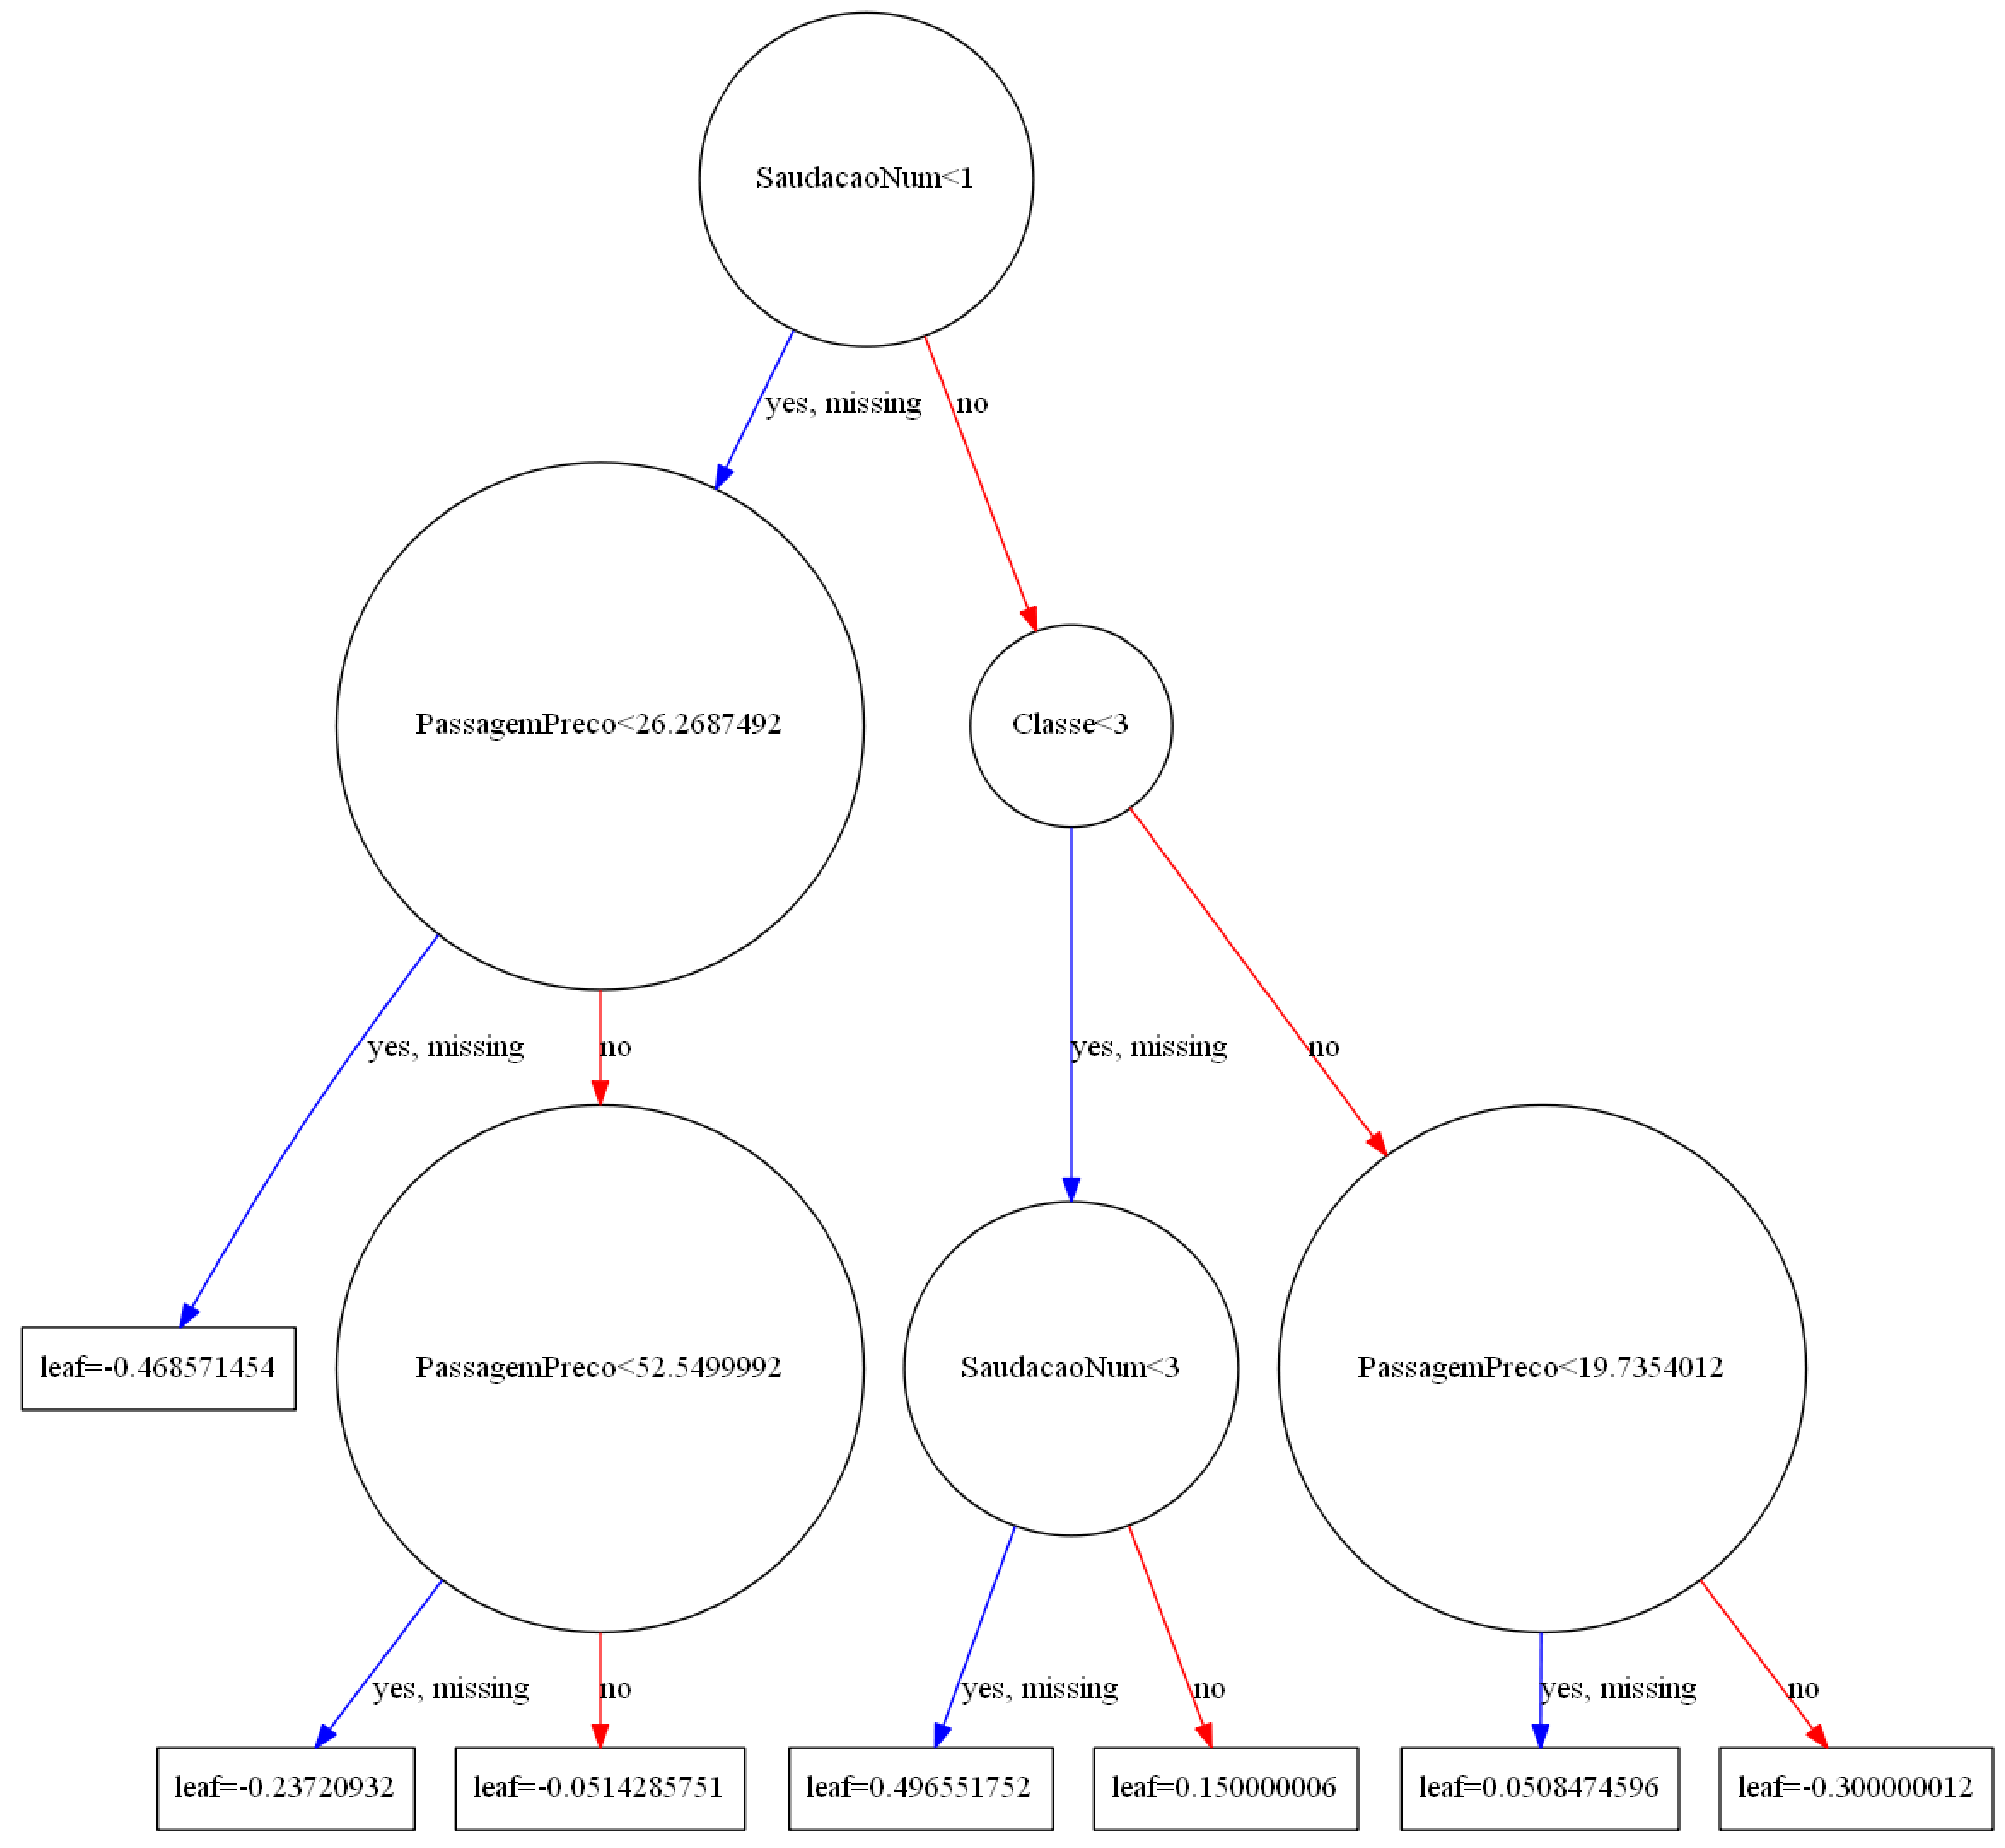

In [28]:
xgb.plot_tree(xgb_model)
fig = pl.gcf()
fig.set_size_inches(150, 100)